# Data Pre-Processing

Import Packages And CSV

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", 100)

# creating DataFrame
df = pd.read_csv(r"E:\All project file\customer_categorisation\data\raw\marketing_campaign.csv", sep=",")

In [58]:
# Print shape of dataset
print(df.shape)

(2240, 29)


## Data Cleaning
* Handling Missing values
* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset


Checking null Values


In [59]:
## feature with nan values
feature_with_nan = [feat for feat in df.columns if df[feat].isnull().sum() > 0]
for col in feature_with_nan:
    print(f"feature{col} has {df[col].isnull().sum()} nan values")

featureIncome has 24 nan values


In [60]:
# filling all nan values with mean or median
df["Income"].fillna(df["Income"].median(), inplace=True)
df.Income.isnull().sum()

0

### 3.2 Other Data Cleaning steps

Duplicate values

In [61]:
df.duplicated().sum() # check for duplicates

0

Remove Z_CostContact and Z_Revenue columns from the dataset as contains only constant value, therefore doesn't create any variance in the dataset.

In [62]:
df.drop(["Z_CostContact", "Z_Revenue"], inplace=True,axis=1) # drop col with nan values in these columns

In [63]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


# Feature Engineering
To improve machine learning model training, leading to better performance and greater accuracy.

## Feature Extraction
* We will extract and create some of the meaningfull features.

repeat some steps from EDA
The following code creates features that would be helpful to describe the profile of the customer

In [64]:
# create new column for feature

from datetime import datetime


df = df.copy()

##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

#  creating a new field to store the total number of purchases made by the customer
df['Total_Purchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total_Purchases","NumWebVisitsMonth"]]




### Type of Features
 *Numeric Features

In [65]:
numeric_features = [fea for fea in df.columns if df[fea].dtype != "O"]
print(f"Number of numerical features: {(numeric_features)}")

Number of numerical features: ['Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total_Purchases', 'NumWebVisitsMonth']


*Categorial features

In [66]:
cat_features = [fea for fea in df.columns if df[fea].dtype == "O"]
print(f"Number of categorical features: {len(cat_features)}")

Number of categorical features: 0


<AxesSubplot: >

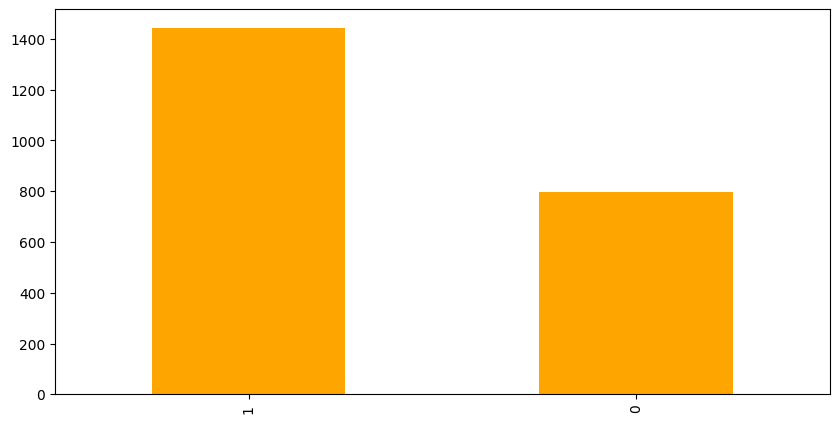

In [67]:
df['Marital Status'].value_counts().plot(kind='bar', figsize=(10, 5), color='orange')

*Continues Features

In [68]:
continuous_features = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() > 10]
print(f"Number of continuous features: {(continuous_features)}")
print(f"Number of categorical features: {len(continuous_features)}")

Number of continuous features: ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total_Purchases', 'NumWebVisitsMonth']
Number of categorical features: 17


### Multicollinearity Check
### Variance Inflation Factor (VIF)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

        
#we will remove the datetime column which is not required for the vif checking
cont_features = continuous_features.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
cont_features.remove('Total_Spending')
cont_features.remove('Total_Purchases')
compute_vif(cont_features, df)
# other_columns

,Variable,VIF
0,Age,1.075477
1,Income,2.124329
2,Days_as_Customer,1.221084
3,Recency,1.005322
4,Wines,2.638641
5,Fruits,1.933381
6,Meat,2.740437
7,Fish,2.069189
8,Sweets,1.898122
9,Gold,1.480570


” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “


**As we can see the Vif for the columns are less than 5, we can safely assume that the data has not such correlations.

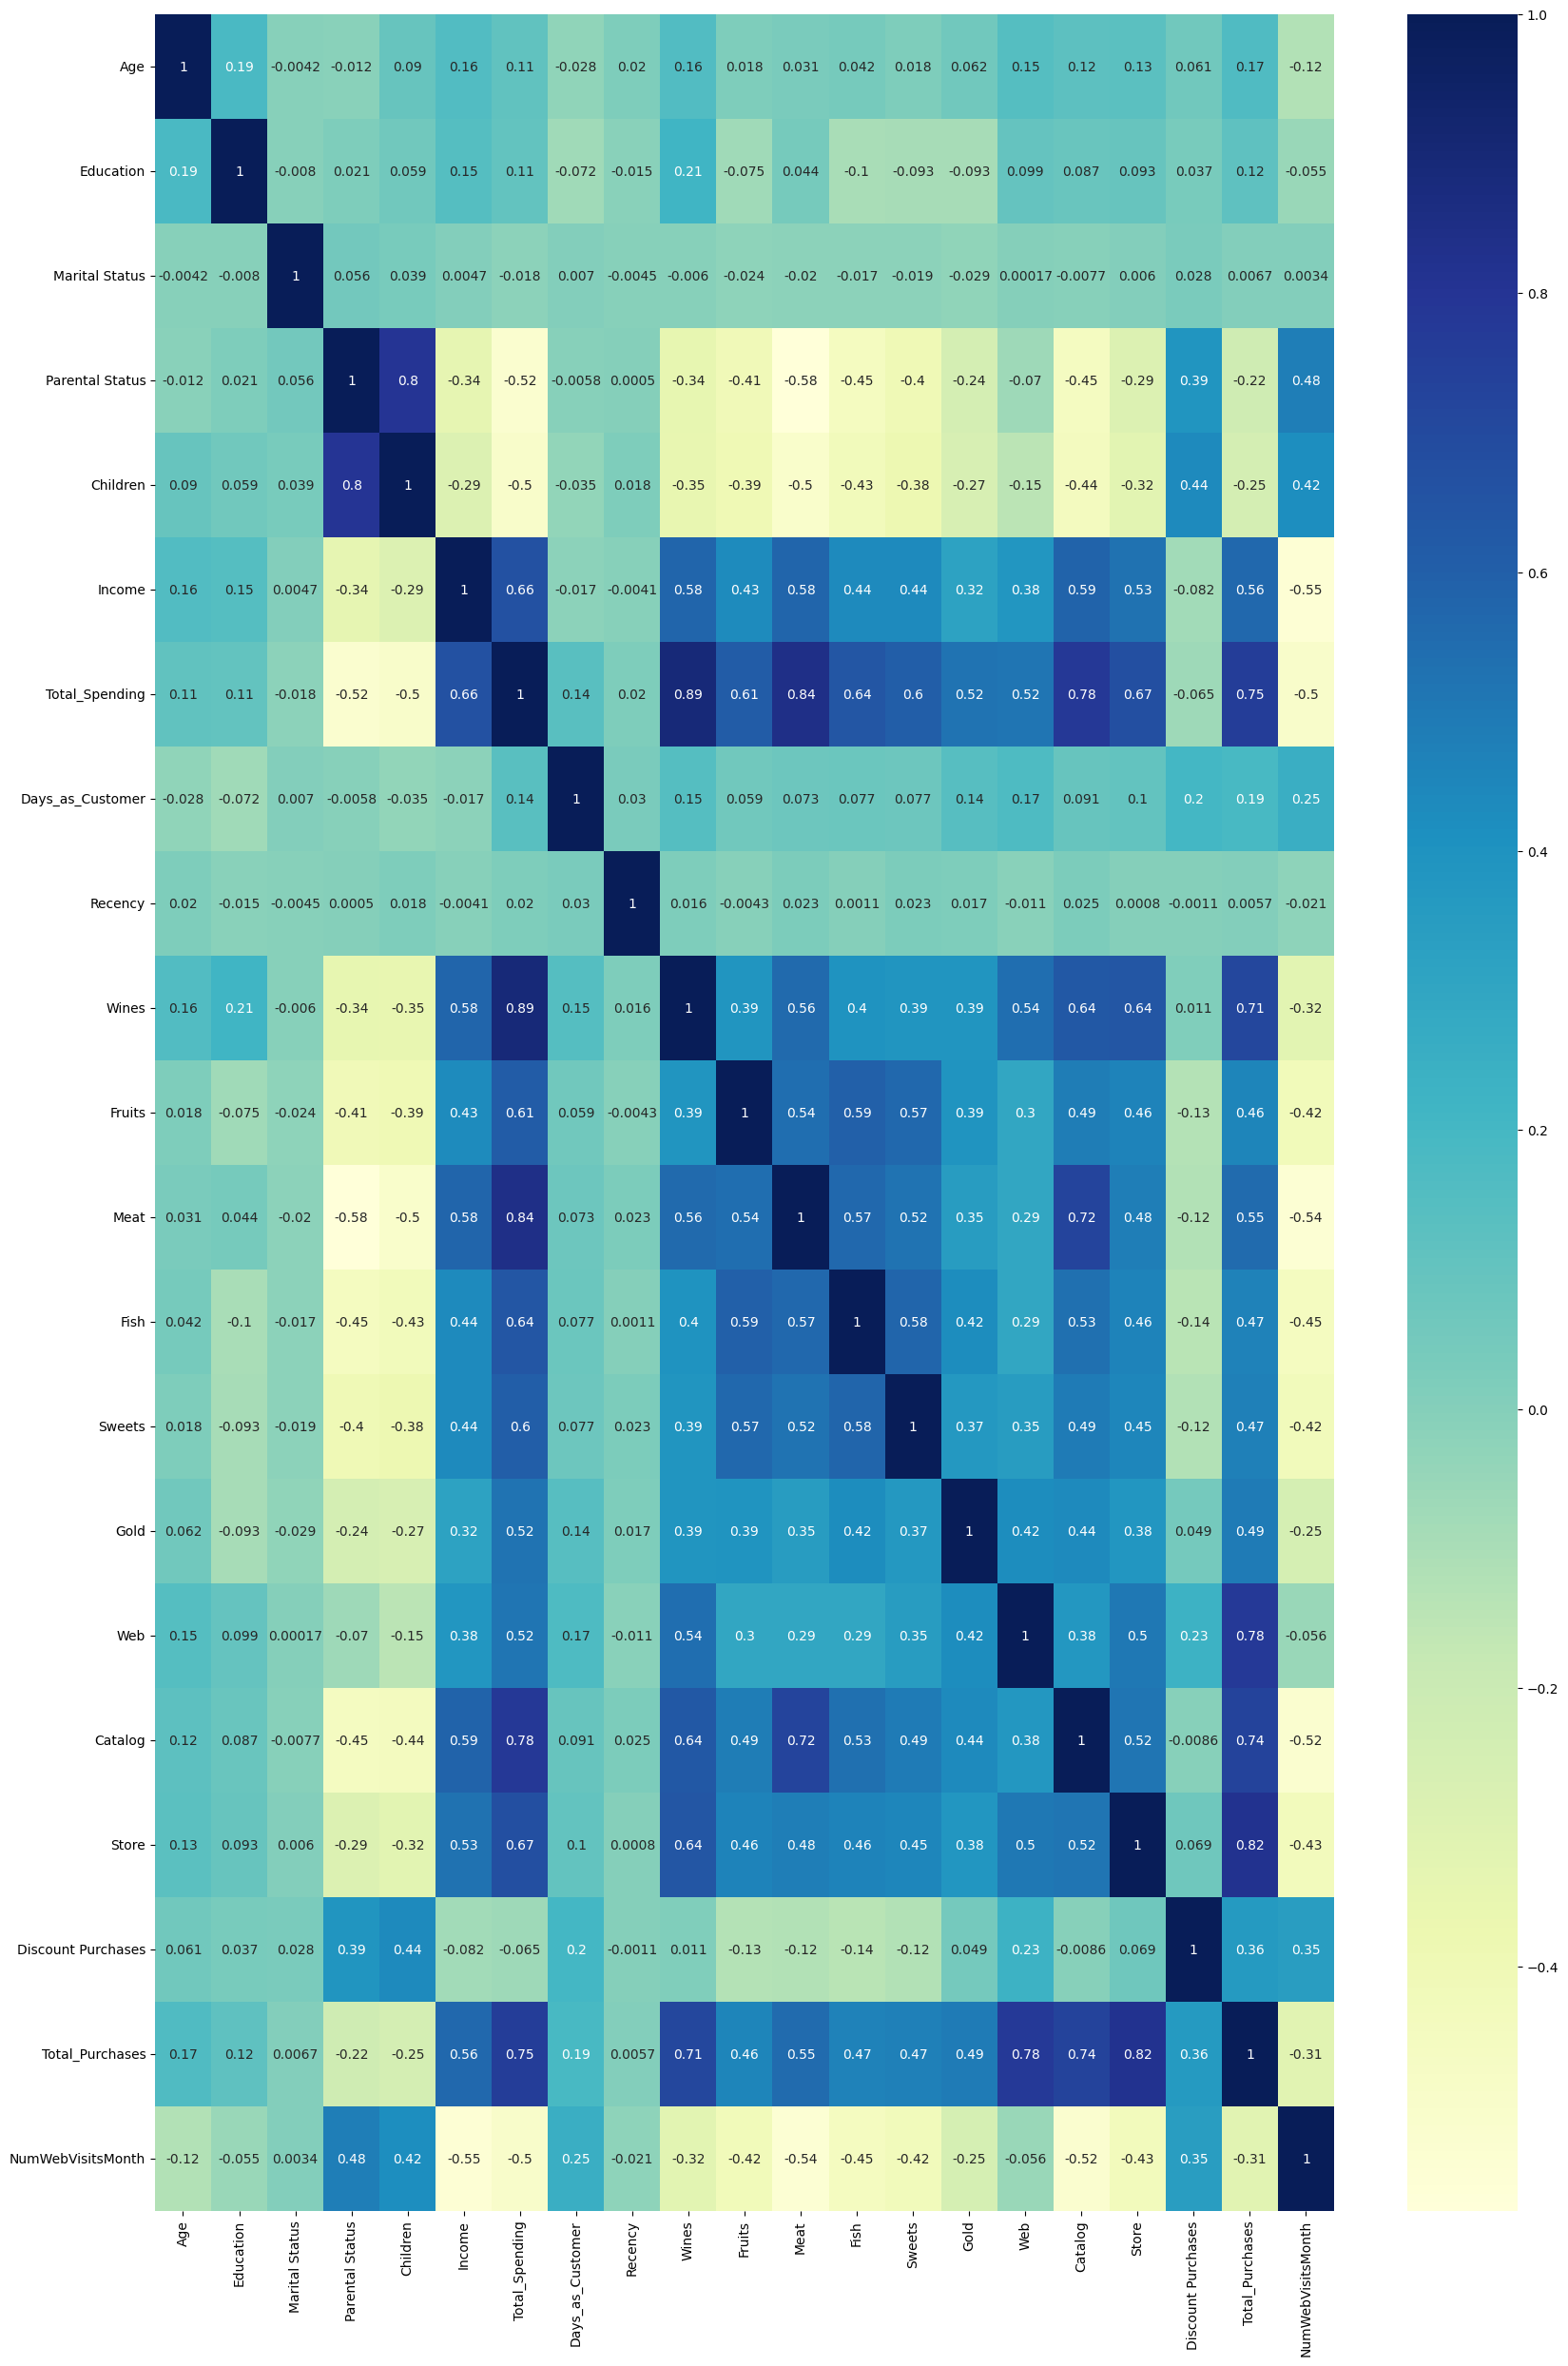

In [70]:
plt.figure(figsize = (20,30))
num_features = [feature for feature in df.columns if df[feature].dtype != 'object' and feature not in ['ID','total_spend','total_no_shopp']]
## as total_spend and total_no_shopp are the summation of other features, we will not check the correlation for them.


sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

## Outliers Detection

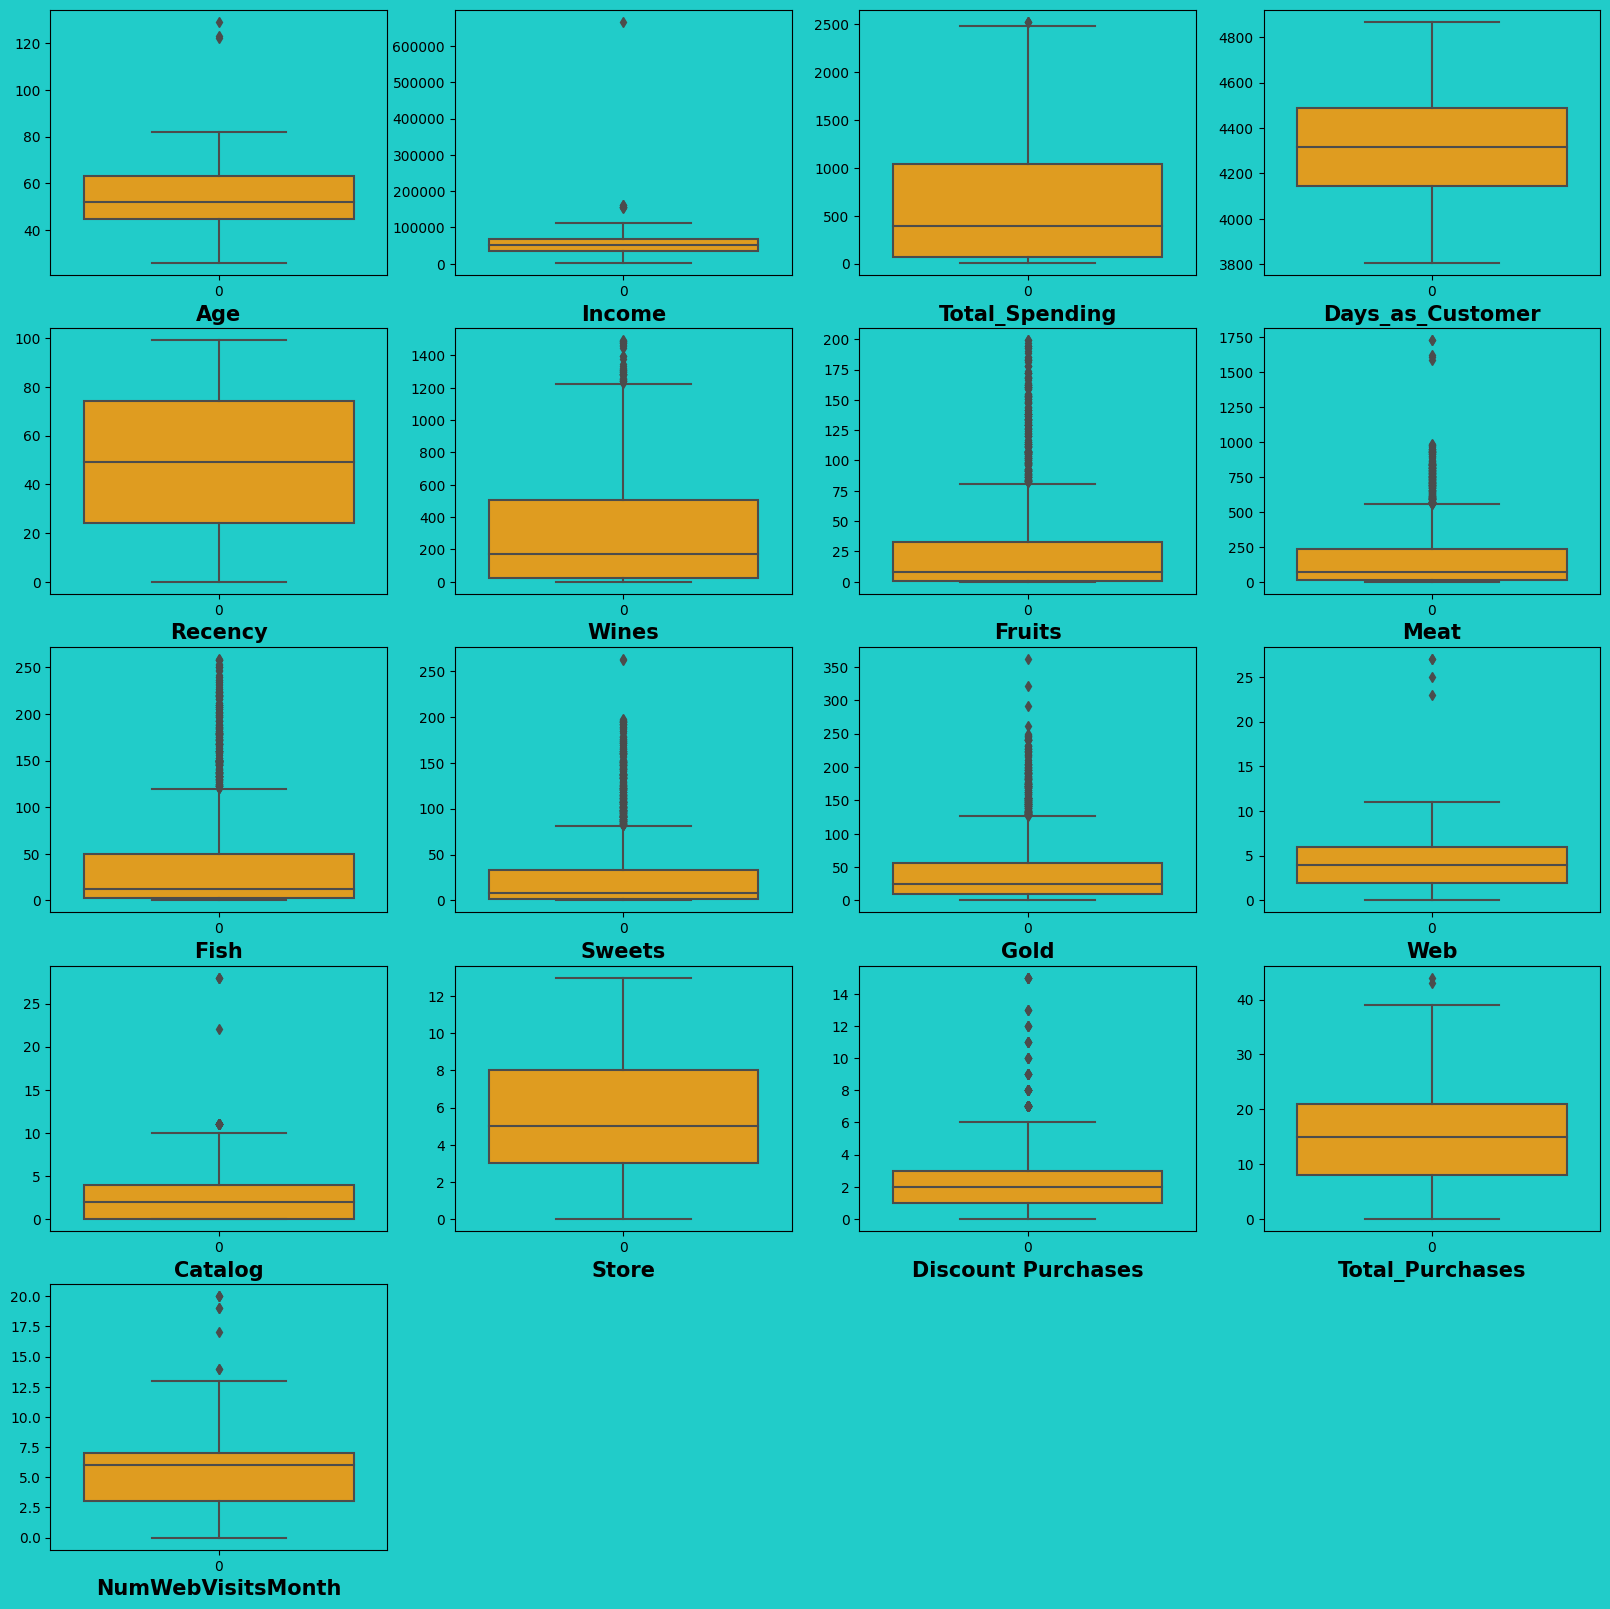

In [71]:
plt.figure(figsize=(20, 20),facecolor='#21ccc9')
plt.title('outliers in numerical features', fontsize=20, fontweight='bold')
for i in range(len(continuous_features)):
    plt.subplot(5, 4, i+1)
    plt.xlabel(continuous_features[i], fontsize=15, fontweight='bold')
    ax=sns.boxplot(df[continuous_features[i]],color='orange')
    ax.set_fc('#21ccc9') 
    

report

* We can see, there are no such outliers in Recency and Days_as_Customer Column
* But there are outliers in following columns -
    * Income
    * Wines
    * Fruits
    * Meat
    * Fish
    * Sweets
    * Gold
    * Age
    * Total Spending
    


Detecting Outlier and Capping it

In [72]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [73]:
for col in continuous_features:
    df = detect_outliers(col)


 #### Age ####
percentile25 45.0
percentile75 63.0
Upper limit 90.0
Lower limit 18.0

 #### Income ####
percentile25 35538.75
percentile75 68289.75
Upper limit 117416.25
Lower limit -13587.75

 #### Total_Spending ####
percentile25 68.75
percentile75 1045.5
Upper limit 2510.625
Lower limit -1396.375

 #### Days_as_Customer ####
percentile25 4145.75
percentile75 4490.25
Upper limit 5007.0
Lower limit 3629.0

 #### Recency ####
percentile25 24.0
percentile75 74.0
Upper limit 149.0
Lower limit -51.0

 #### Wines ####
percentile25 23.75
percentile75 504.25
Upper limit 1225.0
Lower limit -697.0

 #### Fruits ####
percentile25 1.0
percentile75 33.0
Upper limit 81.0
Lower limit -47.0

 #### Meat ####
percentile25 16.0
percentile75 232.0
Upper limit 556.0
Lower limit -308.0

 #### Fish ####
percentile25 3.0
percentile75 50.0
Upper limit 120.5
Lower limit -67.5

 #### Sweets ####
percentile25 1.0
percentile75 33.0
Upper limit 81.0
Lower limit -47.0

 #### Gold ####
percentile25 9.0
percentile7

* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [74]:
df["Age"].quantile(0.25), df["Age"].quantile(0.75)

(45.0, 63.0)

In [75]:
df["Age"].quantile(0.75) - df["Age"].quantile(0.25)

18.0

In [76]:
uper_limit = df["Age"].quantile(0.75) + 1.5 * (df["Age"].quantile(0.75) - df["Age"].quantile(0.25))
uper_limit

90.0

In [77]:
lower_limit = df["Age"].quantile(0.25) - 1.5 * (df["Age"].quantile(0.75) - df["Age"].quantile(0.25))
lower_limit

18.0

In [78]:
df

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total_Purchases,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617.0,4776,58,635,81,546,120.5,81,88.0,8,10,4.0,3,25.0,7
1,68,2,0,1,2,46344.0,27.0,3930,38,11,1,6,2.0,1,6.0,1,1,2.0,2,6.0,5
2,57,2,1,0,0,71613.0,776.0,4277,26,426,49,127,111.0,21,42.0,8,2,10.0,1,21.0,4
3,38,2,1,1,1,26646.0,53.0,3870,26,11,4,20,10.0,3,5.0,2,0,4.0,2,8.0,6
4,41,4,1,1,1,58293.0,422.0,4126,94,173,43,118,46.0,27,15.0,5,3,6.0,5,19.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,1,1,1,61223.0,1341.0,4346,46,709,43,182,42.0,81,126.5,9,3,4.0,2,18.0,5
2236,76,4,1,1,3,64014.0,444.0,3866,56,406,0,30,0.0,0,8.0,8,2,5.0,6,22.0,7
2237,41,2,0,0,0,56981.0,1241.0,4120,91,908,48,217,32.0,12,24.0,2,3,13.0,1,19.0,6
2238,66,3,1,1,1,69245.0,843.0,4121,8,428,30,214,80.0,30,61.0,6,5,10.0,2,23.0,3


Checking Skewness after Outlier Capping

In [79]:
df[continuous_features].skew()

Age                   0.120199
Income                0.090027
Total_Spending        0.860245
Days_as_Customer      0.005415
Recency              -0.001987
Wines                 1.096611
Fruits                1.233953
Meat                  1.213585
Fish                  1.230822
Sweets                1.213346
Gold                  1.111307
Web                   0.710853
Catalog               1.071866
Store                 0.702237
Discount Purchases    1.100205
Total_Purchases       0.240896
NumWebVisitsMonth    -0.228013
dtype: float64

# Feature Transformation

## Scaling



* StandardScaler StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

* PowerTransformer Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

* ColumnTransformer Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

* SimpleImputer  is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

* Pipeline The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__' .

In [80]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]


In [82]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline




dataC = df.copy()

numeric_pipeline = Pipeline(steps=
                            [("Imputer", SimpleImputer(strategy='constant', fill_value=0)), 
                             ("StandardScaler", StandardScaler())]
                           )

outlier_features_pipeline = Pipeline(steps=
                                     [("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
                                      ("transformer", PowerTransformer(standardize=True))]
                                    )

preprocessor = ColumnTransformer(
    [
        ("numeric pipeline",numeric_pipeline, numeric_features),
        ("Outliers Features Pipeline", outlier_features_pipeline, outlier_features)
    ]
)

columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= columns )
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()

After scaling, let's have a glimpse of the scaled dataset :


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total_Purchases,NumWebVisitsMonth
0,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,1.976745,0.307039,1.488353,2.697675,-0.550785,0.509888,1.322811,0.724452,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005341,1.315365
1,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-1.667011,-0.383664,-1.156408,-0.594004,-1.166125,-0.140168,-1.155676,-0.127397,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.239521,-1.441417
2,-0.458383,0.742460,-1.584605,-1.264505,0.943420,-0.172468,-0.798086,1.488353,-0.228262,1.295237,-0.790225,0.801024,-0.553322,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.361223,0.661170
3,-0.458383,0.742460,0.631072,0.065928,-1.204881,-1.925433,-0.798086,-0.778585,-0.959746,-0.550785,-0.140168,-0.894783,0.298528,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.315014,-1.117211
4,1.533425,0.742460,0.631072,0.065928,0.307056,-0.822831,1.550305,0.354884,0.137480,0.064556,1.810001,0.540131,-0.127397,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033428,0.179322


In [91]:
scaled_data.to_csv("processed_data.csv", index=False)


In [93]:
scaled_data.to_pickle("processed_data.pkl")
